#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Basic Data Exploration

In [3]:
#First, let's see the info of our dataset
df.info()
#As we can see, there are about 13 columns, from 0 to 148653 rows.
#We have 8 float64, 2 int64 and 3 objects in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [4]:
#Let's now see the dircribtion of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,148654.0,74327.500000,42912.857795,1.00,37164.250,74327.50,111490.750,148654.00
BasePay,148045.0,66325.448840,42764.635495,-166.01,33588.200,65007.45,94691.050,319275.01
OvertimePay,148650.0,5066.059886,11454.380559,-0.01,0.000,0.00,4658.175,245131.88
OtherPay,148650.0,3648.767297,8056.601866,-7058.59,0.000,811.27,4236.065,400184.25
Benefits,112491.0,25007.893151,15402.215858,-33.89,11535.395,28628.62,35566.855,96570.66
TotalPay,148654.0,74768.321972,50517.005274,-618.13,36168.995,71426.61,105839.135,567595.43
TotalPayBenefits,148654.0,93692.554811,62793.533483,-618.13,44065.650,92404.09,132876.450,567595.43
Year,148654.0,2012.522643,1.117538,2011.00,2012.000,2013.00,2014.000,2014.00
Notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Let's see the shape rows of the dataset
num_rows = df.shape[0]
print("Number of rows in the dataset:", num_rows)
#Let's see the shape columns of the dataset
num_columns = df.shape[1]
print("Number of columns in the dataset:", num_columns)

Number of rows in the dataset: 148654
Number of columns in the dataset: 13


In [6]:
#Let's see the types of our dataset, note that I have already mentioned this in the info, but I did it again as required.
df_types = df.dtypes
print("Data types of each column:")
print(df_types)

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [7]:
#Let's check for the missing data in our dataset
df.isnull().sum()
#As we can see, we have missing values in our dataset in (BasePay, Benefits, Notes, Status, OtherPay, OvertimePay)
#As we can notice there is a lot of missing values in the columns Notes and Status

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [8]:
#Checking for duplicated data
df.duplicated().sum()
#As we can see, there is no duplicated data in our dataset

0

# Descriptive Statistics

In [9]:
### There is an easy way to know the mean, median, mode, minimum, and maximum in each columns with describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,148654.0,74327.500000,42912.857795,1.00,37164.250,74327.50,111490.750,148654.00
BasePay,148045.0,66325.448840,42764.635495,-166.01,33588.200,65007.45,94691.050,319275.01
OvertimePay,148650.0,5066.059886,11454.380559,-0.01,0.000,0.00,4658.175,245131.88
OtherPay,148650.0,3648.767297,8056.601866,-7058.59,0.000,811.27,4236.065,400184.25
Benefits,112491.0,25007.893151,15402.215858,-33.89,11535.395,28628.62,35566.855,96570.66
TotalPay,148654.0,74768.321972,50517.005274,-618.13,36168.995,71426.61,105839.135,567595.43
TotalPayBenefits,148654.0,93692.554811,62793.533483,-618.13,44065.650,92404.09,132876.450,567595.43
Year,148654.0,2012.522643,1.117538,2011.00,2012.000,2013.00,2014.000,2014.00
Notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Calculate mean of salary which is (TotalPay) in our dataset
mean_totalpay = df['TotalPay'].mean()
print('The mean of salary is: ', mean_totalpay)

The mean of salary is:  74768.32197169267


In [12]:
# Calculate median of salary which is (TotalPay) in our dataset
median_totalpay = df['TotalPay'].median()
print('The median of salary is: ', median_totalpay)

The median of salary is:  71426.60999999999


In [13]:
# Calculate mode of salary which is (TotalPay) in our dataset
mode_totalpay = df['TotalPay'].mode().values[0]
print('The mode of salary is: ', mode_totalpay)

The mode of salary is:  0.0


In [14]:
# Calculate minimum of salary which is (TotalPay) in our dataset
min_totalpay = df['TotalPay'].min()
print('The minimum of salary is: ', min_totalpay)

The minimum of salary is:  -618.13


In [15]:
# Calculate maximum of salary which is (TotalPay) in our dataset
max_totalpay = df['TotalPay'].max()
print('The maximum of salary is: ', max_totalpay)

The maximum of salary is:  567595.43


In [16]:
# The range of salaries, to do so, we can sub the max from the min salary to get the value
totalpay_range = max_totalpay - min_totalpay
print('The range of salaries is: ', totalpay_range)

The range of salaries is:  568213.56


In [17]:
# The standard deviation of salaries
std_totalpay = df['TotalPay'].std()
print('The standard deviation of salaries is:', std_totalpay)

The standard deviation of salaries is: 50517.005273949944


# Data Cleaning

In [18]:
#First, let's again see the missing values in our dataset
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

As we can see, the are a lot of missing values in Notes and Status, and their numbers is nearly close to the whole number of the dataset. 
So, because of that the approperiate method to handle this kind of missing values is to drop these columns.

### Creating a copy of the dataset to clean it

In [19]:
df_copy = df.copy()

In [20]:
df_copy.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [21]:
#Now, let's drop them from the dataset
df_copy = df.drop(['Notes', 'Status'], axis=1)
#Checking the dataset after dropping the missing columns
df_copy.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [22]:
#Checking for the missing values after dropping 
df_copy.isna().sum()
#There is still two columns that contain misssing values

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [23]:
#For BasePa and TotalPay, I am going to fill them with mean, this is because this is one of the most popular approch to fill
#Null data in a numeric column
df_copy['BasePay'].fillna(df_copy['BasePay'].mean(), inplace=True)
df_copy['Benefits'].fillna(df_copy['Benefits'].mean(), inplace=True)
df_copy['OvertimePay'].fillna(df_copy['OvertimePay'].mean(), inplace=True)
df_copy['OtherPay'].fillna(df_copy['OtherPay'].mean(), inplace=True)

In [24]:
#Let's see again the null data in our dataset
df_copy.isna().sum()
#As we can see now, there is no null data in our dataset

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# Basic Data Visualization

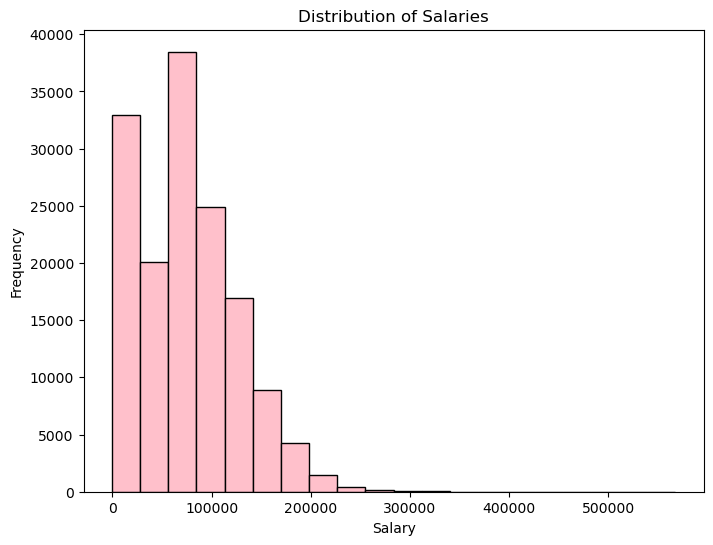

In [99]:
# Create a histogram of salaries
plt.figure(figsize=(8, 6))
plt.hist(df_copy['TotalPay'], bins=20, edgecolor='black', color='pink')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

In [104]:
df_copy.JobTitle.value_counts()

JobTitle
Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: count, Length: 2159, dtype: int64

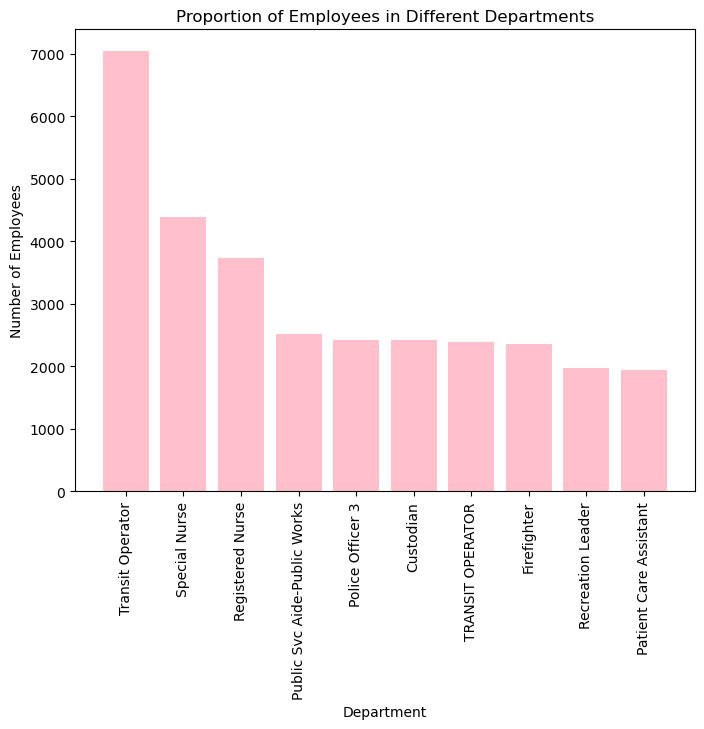

In [98]:
# Calculate the proportion of employees in each department
department_counts = df_copy['JobTitle'].value_counts().head(10)  
department_labels = department_counts.index.tolist()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(department_labels, department_counts, color='pink')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Proportion of Employees in Different Departments')
plt.xticks(rotation=90) 
plt.show()


# Transit Operator had the highest Proportion of Employees compared with others.

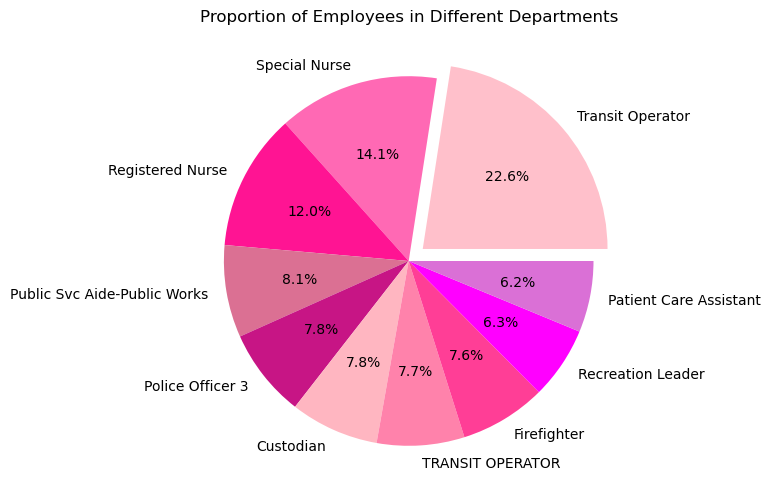

In [102]:
# Calculate the proportion of employees in each department
department_counts = df_copy['JobTitle'].value_counts().head(10)
department_labels = department_counts.index.tolist()

# Define the explode values
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Create a custom color palette with shades of pink
custom_colors = ['#FFC0CB', '#FF69B4', '#FF1493', '#DB7093', '#C71585',
                 '#FFB6C1', '#FF82AB', '#FF3E96', '#FF00FF', '#DA70D6']

# Create a pie chart with the custom color palette
plt.figure(figsize=(8, 6))
plt.pie(department_counts, labels=department_labels, autopct='%1.1f%%', explode=explode, colors=custom_colors)
plt.title('Proportion of Employees in Different Departments')
plt.show()

#As we can see, Transit Operator has the highest value compared with the others.

# Grouped Analysis

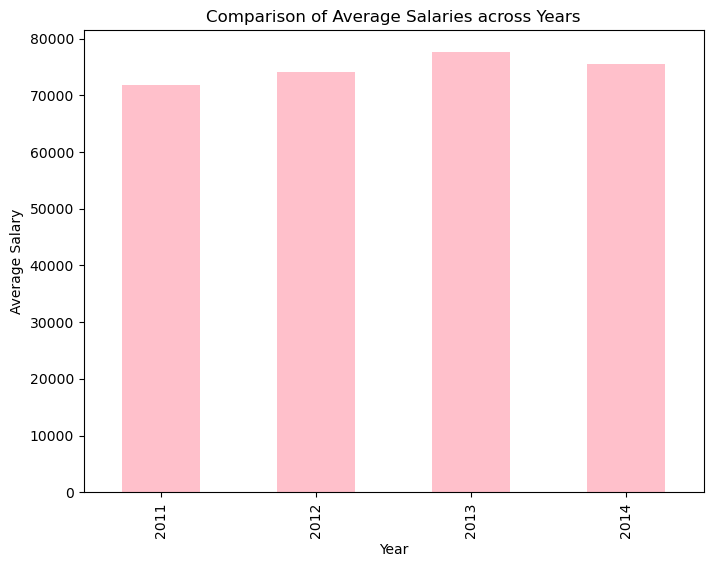

In [97]:
grouped_data = df_copy.groupby('Year')['TotalPay'].mean()

# Compare the average salaries across different groups througout the years
grouped_data.plot(kind='bar', figsize=(8, 6), color='pink')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Comparison of Average Salaries across Years')
plt.show()


#From the graph, we can see that,the average salaries increase during the years but decrease a bit in the last year wich is 
#2014, this is if we take the mean of the it. 

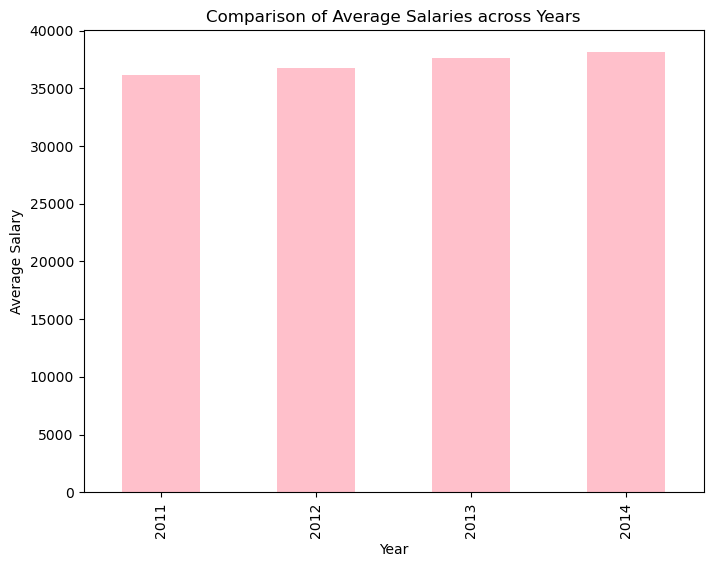

In [59]:
#Let's see if we take the size of it
grouped_data = df_copy.groupby('Year')['TotalPay'].size()

# Compare the average salaries across different groups througout the years
grouped_data.plot(kind='bar', figsize=(8, 6), color='pink')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Comparison of Average Salaries across Years')
plt.show()


#From the graph, we can see that,the average salaries increase during the years if we take the size of it. And this is something
#expected in our world of course.

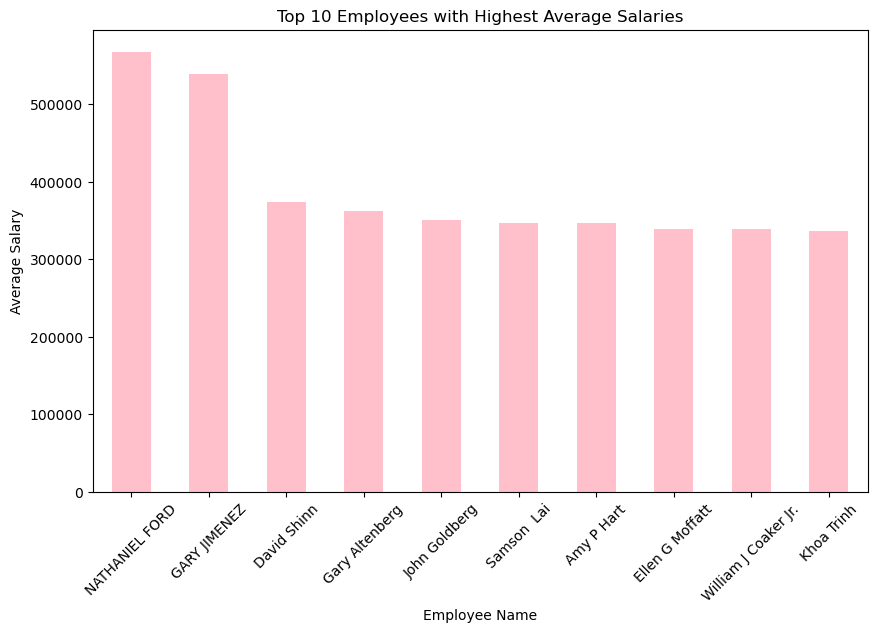

In [52]:
# Group the data by EmployeeName
grouped_data = df_copy.groupby('EmployeeName')['TotalPay'].mean().nlargest(10)

# Compare the average salaries across different groups
grouped_data.plot(kind='bar', figsize=(10, 6), color='pink')
plt.xlabel('Employee Name')
plt.ylabel('Average Salary')
plt.title('Top 10 Employees with Highest Average Salaries')
plt.xticks(rotation=45)
plt.show()

#As we can see from the graph, we can see that the top 10 employees with high salaries and we can notice that
# NATHANIEL FORD and GARY JIMENEZ had the highest salaries compared with others.

# Simple Correlation Analysis

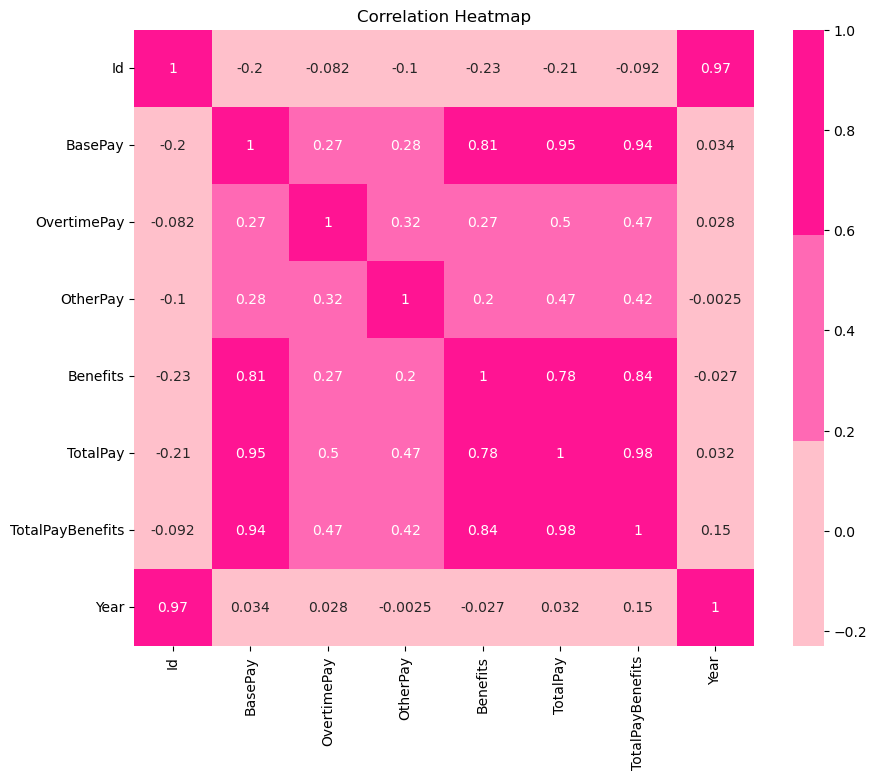

In [96]:
# Select only the numeric columns from the DataFrame
numeric_columns = df_copy.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a custom color palette with shades of pink
custom_palette = sns.color_palette(['#FFC0CB', '#FF69B4', '#FF1493'])

# Create a heatmap using seaborn with the custom color palette
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette)
plt.title('Correlation Heatmap')
plt.show()

*From the heatmap, we can see that there is a correlation between the target which is the TotalPay and others columns*

*We can see there is a corr between BasePay and TotalPay and TotalPayBenefits and TotalPay is completly high*

C:\Users\habob\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


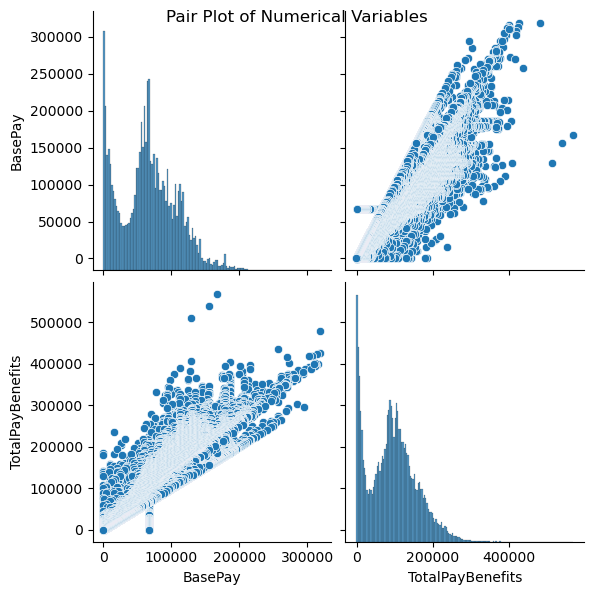

In [94]:
sns.pairplot(df_copy[['BasePay', 'TotalPayBenefits']],height=3)
plt.suptitle('Pair Plot of Numerical Variables')
plt.show()

In [85]:
# Let's see the corr between BasePay and TotalPay
basepay_corr = df_copy['TotalPay'].corr(df_copy['BasePay'])
basepay_corr

#As we can see, the corr is high around 0.95

0.9505142922626444

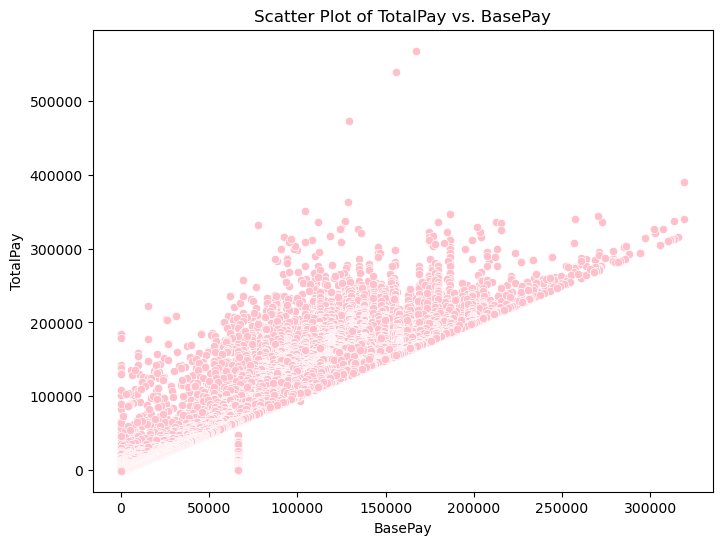

In [86]:
# Scatter Plot of the corr between BasePay and TotalPay
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BasePay', y='TotalPay', data=df_copy, color='pink')
plt.title('Scatter Plot of TotalPay vs. BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()

In [83]:
# Let's see the corr between TotalPayBenefits and TotalPay
TotalPayBenefits_corr = df_copy['TotalPay'].corr(df_copy['TotalPayBenefits'])
TotalPayBenefits_corr

#As we can see, the corr is high around 0.97

0.977312852207212

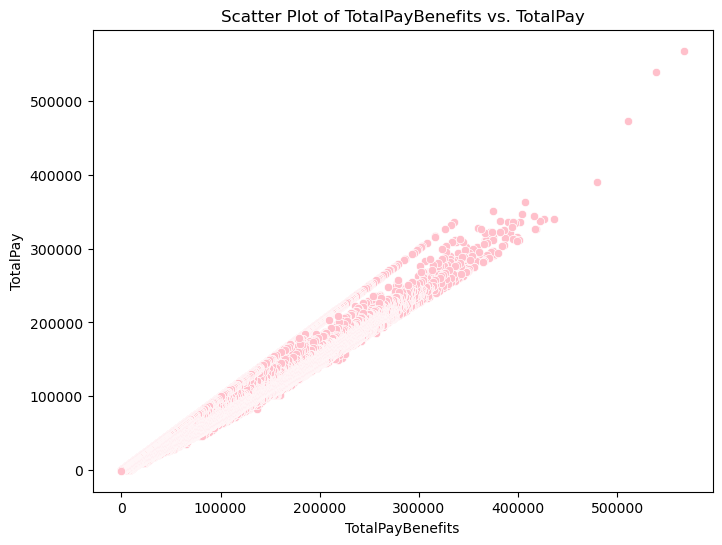

In [88]:
# Scatter Plot of the corr between TotalPayBenefits and TotalPay
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalPayBenefits', y='TotalPay', data=df_copy, color='pink')
plt.title('Scatter Plot of TotalPayBenefits vs. TotalPay')
plt.xlabel('TotalPayBenefits')
plt.ylabel('TotalPay')
plt.show()

# Summary of Insights

In [ ]:
## Dataset Overview

- There are about 13 columns
- There are 148653 rows from 0 to 148653.
- There are three different daya types 8 float64, 2 int64 and 3 objects in our dataset.
- There are missing data in the dataset in (BasePay, Benefits, Notes, Status, OtherPay, OvertimePay)
- There is no duplicated data
- There are a lot of missing values in the columns Notes and Status

## Range of Salaries

- The mean of salary is:  74768.32197169267
- The median of salary is:  71426.60999999999
- The mode of salary is:  0.0
- The minimum of salary is:  -618.13
- The maximum of salary is:  567595.43
- The range of salaries is:  568213.56
- The standard deviation of salaries is: 50517.005273949944

## Data Cleaning

- 'Notes' and 'Status' columns have a lot of missing values, so I have dropped them.
- Filled the missing data in (BasePay, OvertimePay, OtherPay, Benefits) with the mean.


## Data Visualizations

- Calculate the proportion of employees in each department and showed with a histogram.
- Visualized the proportion of employees in each department a pie chart with the top 10 only.
- From the graphs, we can notice that Transit Operator had the highest Proportion of Employees compared with others.


## Grouped Analysis

- Grouped the 'Year' with 'TotalPay' and the TotalPay was increasing each year.
- Grouped the 'EmployeeName' with 'TotalPay' and showed the top 10, NATHANIEL FORD and GARY JIMENEZ had the highest salaries compared with others.


## Correlation Analysis

- There is a correlation between ('BasePay' and 'TotalPay' ) and ('TotalPayBenefits' and 'TotalPay')
- Created a scatterplot to show their correlation.



# Good Luck!